In [1]:
from time import time
import numpy as np
import pandas as pd
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

data = pd.read_excel('data/all_features_v2_dataset_no_header.xlsx')

In [8]:
X_org = data.iloc[:,0:13]  # features
Y_org = data.iloc[:,-1]    # label column

In [9]:
syms = Y_org.to_numpy()
X = X_org.to_numpy()

X[:, 0] = X[:, 0].astype(float)
X[:, 1] = X[:, 1].astype(float)
X[:, 2] = X[:, 2].astype(float)
X[:, 3] = X[:, 3].astype(float)
X[:, 4] = X[:, 4].astype(float)
X[:, 5] = X[:, 5].astype(float)
X[:, 6] = X[:, 6].astype(float)
X[:, 7] = X[:, 7].astype(float)
X[:, 8] = X[:, 8].astype(float)

# columns that contain categorical data
categories = [9, 10, 12]

In [10]:
t = time()
kproto = KPrototypes(n_clusters=9, verbose=2, n_jobs = 4, n_init = 9)
clusters = kproto.fit_predict(X, categorical=categories)

print('Time to cluster: {} mins'.format(round((time() - t) / 60, 2)))

Best run was number 4
Time to cluster: 10.17 mins


[array([[ 0.18783498,  0.15435591,  0.26111471,  0.3249198 ,  0.23455213,
         0.30992501,  0.36049202,  0.22752365,  0.29022409,  4.6862616 ],
       [ 0.19076238,  0.1685592 ,  0.27588162,  0.33681391,  0.30409056,
         0.30806539,  0.31276305,  0.29766961,  0.3081838 , 10.3831332 ],
       [ 0.23834253,  0.41321685,  0.243492  ,  0.19521255,  0.15698373,
         0.21438417,  0.16410014,  0.15830627,  0.2392081 ,  3.93567251],
       [ 0.19899118,  0.17492996,  0.28199837,  0.36181989,  0.2877655 ,
         0.32930292,  0.36812388,  0.28032924,  0.31717517,  7.46501685],
       [ 0.19943089,  0.14926208,  0.24180628,  0.21201895,  0.14820478,
         0.26948523,  0.23601066,  0.13704278,  0.25893117,  2.78911096],
       [ 0.19976606,  0.17493829,  0.27919507,  0.35758218,  0.27169933,
         0.32988971,  0.3805941 ,  0.26750071,  0.31402731,  6.        ],
       [ 0.19520381,  0.17365299,  0.28111652,  0.35439601,  0.29824557,
         0.32103696,  0.34104027,  0.2901625

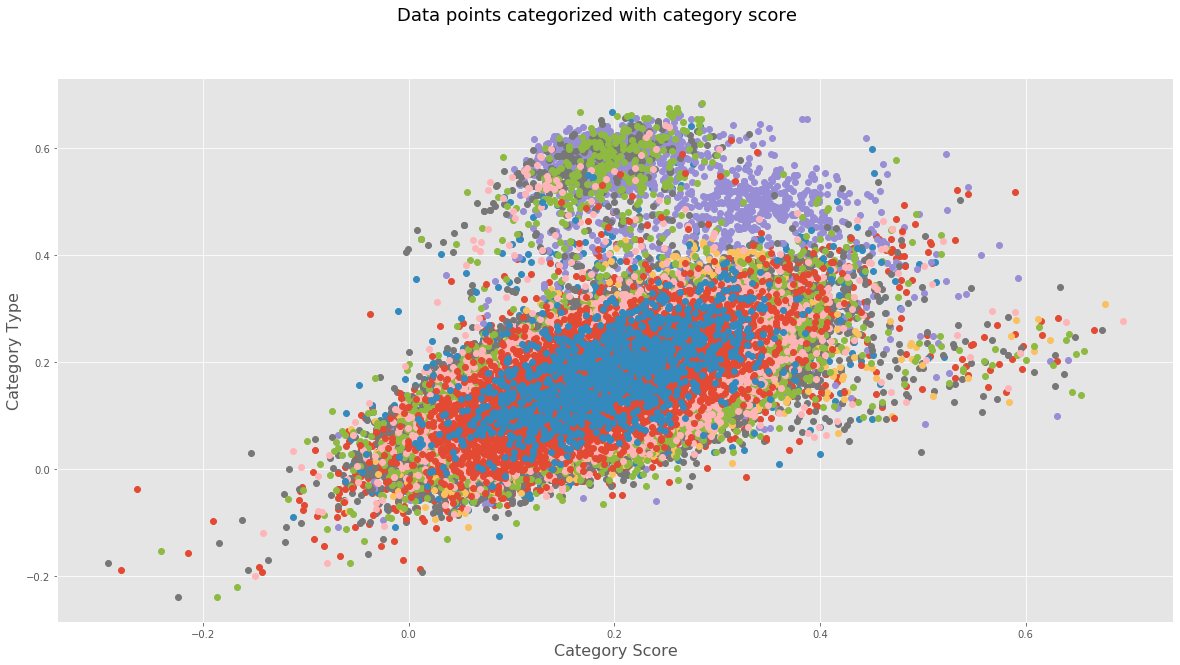

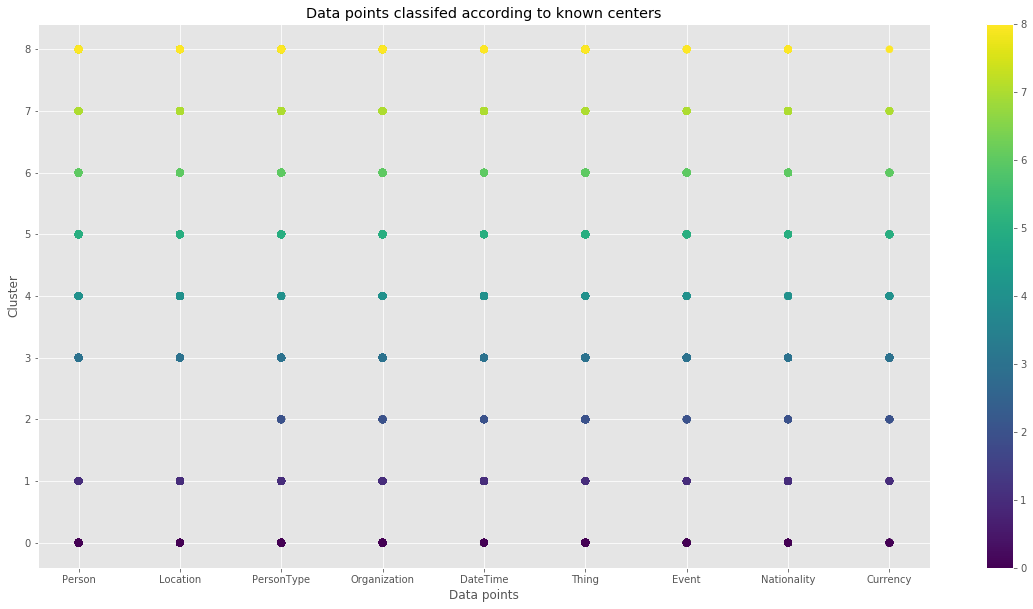

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)
#for s, c in zip(syms, clusters):
#    print("Result: {}, cluster:{}".format(s, c))
# Plot the results
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Data points categorized with category score', fontsize=18)
    plt.xlabel('Category Score', fontsize=16)
    plt.ylabel('Category Type', fontsize=16)
plt.show()
# Clustered result
fig1, ax3 = plt.subplots()
scatter = ax3.scatter(syms, clusters, c=clusters, s=50)
ax3.set_xlabel('Data points')
ax3.set_ylabel('Cluster')
plt.colorbar(scatter)
ax3.set_title('Data points classifed according to known centers')
plt.show()
result = zip(syms, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
#print(sortedR)



In [1]:
#print(sortedR)
cluster_label_freqs = []
for ix in range(0, 10):
    cluster_label_freqs.append({})

    
for label, cluster in sortedR:
    try:
        cluster_label_freqs[cluster][label] += 1
    except KeyError:
        cluster_label_freqs[cluster][label] = 1
    
print(cluster_label_freqs)

cluster_label_df = pd.DataFrame(cluster_label_freqs)
cluster_label_df.head(9)
        

NameError: name 'sortedR' is not defined